# Labeling Methods Walk-Thru

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import vizualization as viz

import getdata as gd
from modeling_main import get_one_model, get_multiple_models

import warnings
warnings.filterwarnings('ignore')

## Comparision between various Trend Labeling methods

#### Metrics for modeling one ticker using the following trend following strategies:
1. Trend Scanning Method
2. Exponential Moving Crossover
3. Simple Moving Average Crossover 

In [2]:
methods = ['trend_labeling', 'exp_ma', 'sim_ma']

clfs = {}
model_metrics_df = pd.DataFrame()

for method in methods:
    clf, model_metrics = get_one_model('EGRX', method=method)
    clfs[method] = clf
    model_metrics_df = pd.concat([model_metrics_df, model_metrics], ignore_index=True)

/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

In [3]:
model_metrics_tbl = model_metrics_df.drop(['symbol', 'type', 'best_model', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           ]
                                           , axis=1)

Modeling Results

In [4]:
model_metrics_tbl

,f1,recall,precision,accuracy,run_time,train_test,cum_rtn,annualized_rtn,sharpe_ratio,method
0,0.291484,0.251391,0.410691,0.601307,4.169450,Train,0.000000,0.000000,0.00,trend_labeling
1,0.577566,0.755386,0.467513,0.769829,0.017564,Test,0.423246,0.204940,0.78,trend_labeling
2,0.322129,0.324693,0.547641,0.523272,6.353441,Train,0.000000,0.000000,0.00,exp_ma
3,0.218925,0.206951,0.232371,0.602607,0.017747,Test,0.250237,0.125209,0.35,exp_ma
4,0.216447,0.194692,0.254957,0.575192,6.219319,Train,0.000000,0.000000,0.00,sim_ma
5,0.009092,0.007411,0.011758,0.457798,0.016253,Test,-0.063834,-0.033528,-0.60,sim_ma


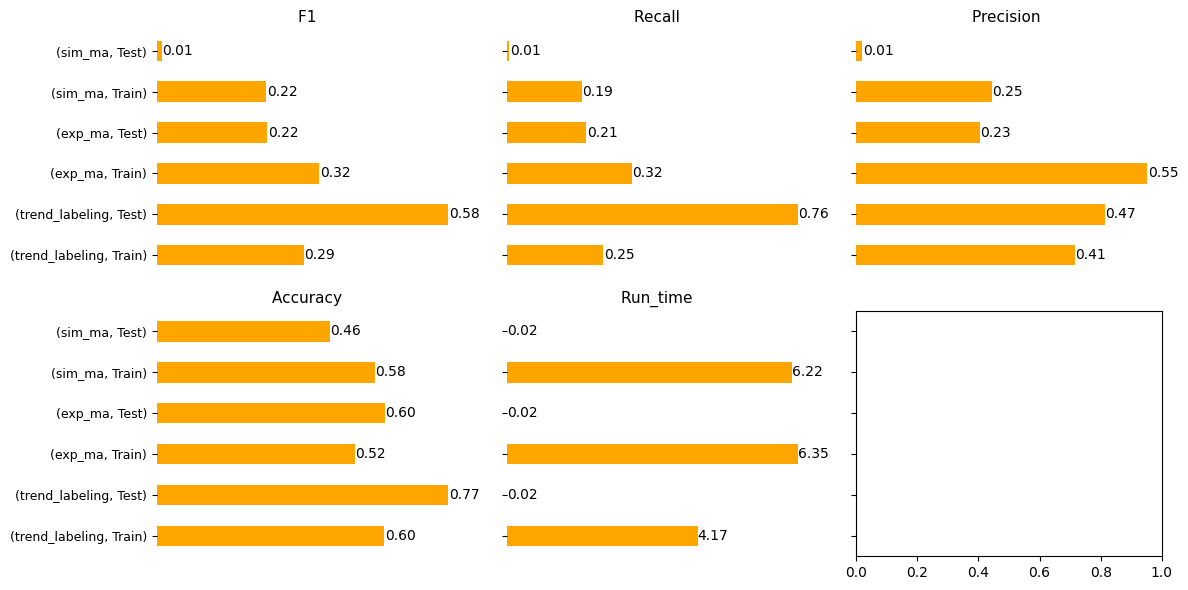

In [5]:
model_metrics_tbl_temp = model_metrics_tbl.set_index(['method', 'train_test'])

viz.plot_model_metrics_grid(model_metrics_tbl_temp[['f1','recall','precision','accuracy','run_time']])


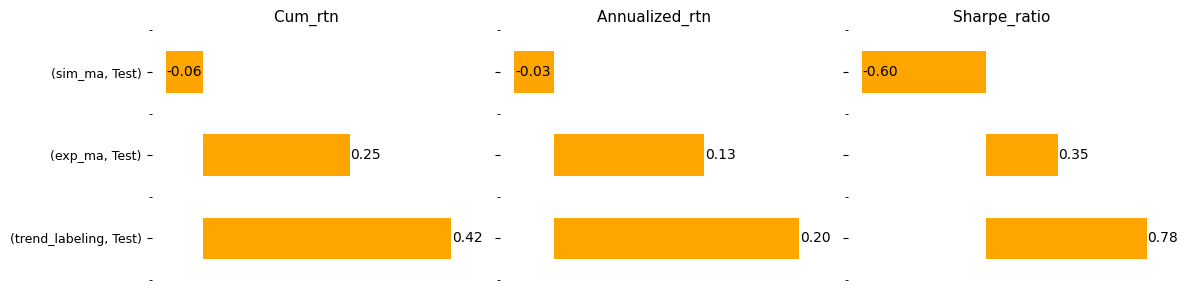

In [6]:
viz.plot_model_metrics_grid(model_metrics_tbl_temp.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])

#### Mean Metrics for list of tickers models using the Trend Scanning Method on various algorithms

In [7]:
lowest_price = 30
highest_price = 40

tickerlst = gd.getFilteredTickerList_Daily(lowest_price=lowest_price, highest_price=highest_price)
print('There are {} tickers between ${} and ${}.'.format(len(tickerlst), lowest_price, highest_price))
print(tickerlst)

There are 21 tickers between $30 and $40.
['AQNU', 'ATEX', 'AVID', 'AVNS', 'BROS', 'CIR', 'CPSI', 'CRTO', 'CTR', 'EGRX', 'FDP', 'FSBW', 'GLP', 'GPRE', 'KYMR', 'PARAP', 'PRCT', 'RNST', 'SCHN', 'TYG', 'XPOF']


In [8]:
clfs = ['random_forest', 
        'standard_bagging_decision_tree', 
        'sequential_bootstrapping_decision_tree',
        'SVC',
        'sequential_bootstrapping_SVC'
        ]

methods = ['trend_labeling', 
           #'exp_ma', 'sim_ma'
           ]

basket_clfs = {}
basket_model_metrics_df = pd.DataFrame()


for method in methods:
    for c in clfs:
        clf, model_metrics = get_multiple_models(tickerlst, type=c, method=method)
        basket_clfs[method] = clf
        basket_model_metrics_df = pd.concat([basket_model_metrics_df, model_metrics], ignore_index=True)

Processing 1/21 AQNU...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

Modeling completed 1/21 AQNU
Processing 2/21 ATEX...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

Modeling completed 2/21 ATEX
Processing 3/21 AVID...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

Modeling completed 3/21 AVID
Processing 4/21 AVNS...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

Modeling completed 4/21 AVNS
Processing 5/21 BROS...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

Modeling completed 5/21 BROS
Processing 6/21 CIR...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

Modeling completed 6/21 CIR
Processing 7/21 CPSI...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

Modeling completed 7/21 CPSI
Processing 8/21 CRTO...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

Modeling completed 8/21 CRTO
Processing 9/21 CTR...


/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t_in, t_out in label_endtime.iteritems():
/Users/horris/MADS_Capstone/ML/afml/sampling/concurrent.py:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items in

#### Modeling Results

In [ ]:
basket_model_metrics_tbl = basket_model_metrics_df.drop([ 'best_model', 'method', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           ]
                                           , axis=1).dropna()

In [ ]:
basket_model_metrics_tbl = basket_model_metrics_tbl.groupby([ 'type', 'train_test'])\
    .agg({'f1': 'mean', 
          'recall': 'mean', 
          'precision': 'mean', 
          'accuracy': 'mean', 
          'run_time': 'mean', 
          'cum_rtn':'mean',
          'annualized_rtn':'mean',
          'sharpe_ratio':'mean',
          'symbol': pd.Series.nunique})

In [ ]:
viz.plot_model_metrics_grid(basket_model_metrics_tbl[['f1','recall','precision','accuracy','run_time']])

In [ ]:
viz.plot_model_metrics_grid(basket_model_metrics_tbl.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])

In [ ]:
basket_model_metrics_tbl

#### Cumulative Retruns of Individual Stocks from the SVC and Sequential Bootstrapped SVC models

In [ ]:
import pandas as pd
results = pd.read_csv('20230413_labeling_origdf.csv')

In [ ]:
trades = results[(results.type.isin(['SVC','sequential_bootstrapping_SVC'])) & (results.train_test == 'Test')]
trades = trades[['type', 'symbol', 'cum_rtn']]#

In [ ]:
trades = trades.set_index(['type', 'symbol'])

In [ ]:
trades.groupby('type').mean()

In [ ]:
groups = trades.groupby(level=0)

# Create a separate bar chart for each group
for name, group in groups:
    group = group.sort_values(by='cum_rtn', ascending=False)
    fig, ax = plt.subplots(figsize=(8, 4))
    group.plot(kind='bar', y='cum_rtn', ax=ax, legend=False)
    tick_labels = list(group.index.get_level_values(1))
    ax.set_xticklabels(tick_labels)
    for i, v in enumerate(group['cum_rtn']):
        ax.text(i, v+0.03 if v >0 else v-0.05, f"{v*100:.0f}%", ha='center')
    ax.set_title(name)
    ax.set_xlabel('Ticker')
    ax.set_ylabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_yticks([])
    plt.show()